In [2]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
nasa = pd.read_csv('project-NASA_Facilities_20250214.csv')  # Load the dataset

In [4]:
nasa.head() #Show first 5 rows

,Center,Facility,Occupied,Status,Record Date,Last Update,Country,Contact,Phone,Location,City,State,Zipcode
0,Kennedy Space Center,Control Room 2/1726/HGR-S,1957.0,NaN,03-01-1996 00:00,06/22/2015 12:00:00 AM,US,Sheryl Chaffee,321-867-8047,"32899(28.538331, -81.378879)",Kennedy Space Center,FL,32899
1,Langley Research Center,Micometeroid/LDEF Analysis Laboratory,1965.0,Active,03-01-1996 00:00,02/25/2013 12:00:00 AM,US,Sherry Johnson,757.864-3848,"23681-2199(37.08681, -76.376649)",Hampton,VA,23681-2199
2,Kennedy Space Center,SRM Rotation and Processing Facility/K6-0494,1984.0,NaN,03-01-1996 00:00,06/22/2015 12:00:00 AM,US,Sheryl Chaffee,321-867-8047,"32899(28.538331, -81.378879)",Kennedy Space Center,FL,32899
3,Marshall Space Flight Center,ET WTC - 14-Inch Trisonic Wind Tunnel 4732,1968.0,Active,03-01-1996 00:00,03/31/2014 12:00:00 AM,US,Pam Caruso,256-544-7795,"35812(34.729538, -86.585283)",Huntsville,AL,35812
4,Marshall Space Flight Center,EB LAB Control Moment Gyro Test & Eval Fac 4487,NaN,Active,06-11-1996 00:00,05/30/2014 12:00:00 AM,US,Pam Caruso,256-544-7795,"35812(34.729538, -86.585283)",Huntsville,AL,35812


In [5]:
# Display dataset information (number of rows, columns, data types, and missing values)
nasa.info() # Helps in understanding the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Center       485 non-null    object 
 1   Facility     485 non-null    object 
 2   Occupied     393 non-null    float64
 3   Status       399 non-null    object 
 4   Record Date  485 non-null    object 
 5   Last Update  479 non-null    object 
 6   Country      485 non-null    object 
 7   Contact      485 non-null    object 
 8   Phone        485 non-null    object 
 9   Location     485 non-null    object 
 10  City         485 non-null    object 
 11  State        485 non-null    object 
 12  Zipcode      485 non-null    object 
dtypes: float64(1), object(12)
memory usage: 49.4+ KB


In [6]:
nasa.shape

(485, 13)

# Data Cleaning and Preprocessing

In [19]:
nasa[['Status', 'Occupied']].isnull().sum()  # Handle missing values in column

Status      86
Occupied    92
dtype: int64

In [21]:
nasa['Occupied'].fillna("Unknown", inplace=True)
nasa['Status'].fillna("Unknown", inplace=True) 

C:\Users\chand\AppData\Local\Temp\ipykernel_10108\2370447481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nasa['Occupied'].fillna("Unknown", inplace=True)
C:\Users\chand\AppData\Local\Temp\ipykernel_10108\2370447481.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nasa['Occupied'].fillna("Unknown", inplace=True)
C:\Users\chand\AppData\Lo

In [23]:
nasa[['Status', 'Occupied']].isnull().sum()

Status      0
Occupied    0
dtype: int64

In [26]:
# Convert date columns to datetime format
nasa['Record Date'] = pd.to_datetime(nasa['Record Date'], errors='coerce')

# Extract Date and Time separately
nasa['Record_Date'] = nasa['Record Date'].dt.date   # Extract only the Date
nasa['Record_Time'] = nasa['Record Date'].dt.time   # Extract only the Time


In [28]:
nasa.tail() #Shows last 5 rows

,Center,Facility,Occupied,Status,Record Date,Last Update,Country,Contact,Phone,Location,City,State,Zipcode,Latitude,Longitude,Record_Date,Record_Time
480,Goddard Space Flight Center,"700: Space Simulation Laboratory, Building 7/1...",1962.0,Active,1996-03-01,08/16/2013 12:00:00 AM,US,Barry Green,301 286 2520,"20771(38.99538, -76.853161)",Greenbelt,MD,20771,38.995380,-76.853161,1996-03-01,00:00:00
481,Goddard Space Flight Center,500: Space-Ground Link Terminal,1977.0,Active,1996-03-01,08/16/2013 12:00:00 AM,US,Barry Green,301 286 2520,"20771(38.99538, -76.853161)",Greenbelt,MD,20771,38.995380,-76.853161,1996-03-01,00:00:00
482,Jet Propulsion Lab,Frequency Standards Laboratory,1985.0,Active,1996-03-01,08-07-2013 00:00,US,Gary Gray,818.354.0701,"91109(34.178124, -118.150662)",PASADENA,CA,91109,34.178124,-118.150662,1996-03-01,00:00:00
483,Marshall Space Flight Center,ET West Vibration Test Facility 4619,Unknown,Active,NaT,03/31/2014 12:00:00 AM,US,Pam Caruso,256-544-7795,"35812(34.729538, -86.585283)",Huntsville,AL,35812,34.729538,-86.585283,NaT,NaT
484,Wallops Flight Facility/GSFC,National Scientific Balloon Facility,1977.0,Active,1996-03-01,07/19/2013 12:00:00 AM,US,Scott H. Schaire,757-824-1120,"23337-5099(37.911289, -75.469622)",Wallops Island,VA,23337-5099,37.911289,-75.469622,1996-03-01,00:00:00


In [30]:
# Convert date columns to datetime format
nasa['Last Update'] = pd.to_datetime(nasa['Last Update'], errors='coerce')

# Extract Date and Time separately
nasa['Last_Update'] = nasa['Last Update'].dt.date   # Extract only the Date
nasa['Last_Update_Time'] = nasa['Last Update'].dt.time   # Extract only the Time

C:\Users\chand\AppData\Local\Temp\ipykernel_10108\2184454149.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nasa['Last Update'] = pd.to_datetime(nasa['Last Update'], errors='coerce')


In [31]:
nasa.head()

,Center,Facility,Occupied,Status,Record Date,Last Update,Country,Contact,Phone,Location,City,State,Zipcode,Latitude,Longitude,Record_Date,Record_Time,Last_Update,Last_Update_Time
0,Kennedy Space Center,Control Room 2/1726/HGR-S,1957.0,Unknown,1996-03-01,2015-06-22,US,Sheryl Chaffee,321-867-8047,"32899(28.538331, -81.378879)",Kennedy Space Center,FL,32899,28.538331,-81.378879,1996-03-01,00:00:00,2015-06-22,00:00:00
1,Langley Research Center,Micometeroid/LDEF Analysis Laboratory,1965.0,Active,1996-03-01,2013-02-25,US,Sherry Johnson,757.864-3848,"23681-2199(37.08681, -76.376649)",Hampton,VA,23681-2199,37.086810,-76.376649,1996-03-01,00:00:00,2013-02-25,00:00:00
2,Kennedy Space Center,SRM Rotation and Processing Facility/K6-0494,1984.0,Unknown,1996-03-01,2015-06-22,US,Sheryl Chaffee,321-867-8047,"32899(28.538331, -81.378879)",Kennedy Space Center,FL,32899,28.538331,-81.378879,1996-03-01,00:00:00,2015-06-22,00:00:00
3,Marshall Space Flight Center,ET WTC - 14-Inch Trisonic Wind Tunnel 4732,1968.0,Active,1996-03-01,2014-03-31,US,Pam Caruso,256-544-7795,"35812(34.729538, -86.585283)",Huntsville,AL,35812,34.729538,-86.585283,1996-03-01,00:00:00,2014-03-31,00:00:00
4,Marshall Space Flight Center,EB LAB Control Moment Gyro Test & Eval Fac 4487,Unknown,Active,1996-06-11,2014-05-30,US,Pam Caruso,256-544-7795,"35812(34.729538, -86.585283)",Huntsville,AL,35812,34.729538,-86.585283,1996-06-11,00:00:00,2014-05-30,00:00:00


In [7]:
!pip install folium


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import folium  # For creating interactive maps
from folium.plugins import MarkerCluster 

In [12]:
nasa.columns #Shows colums 

Index(['Center', 'Facility', 'Occupied', 'Status', 'Record Date',
       'Last Update', 'Country', 'Contact', 'Phone', 'Location', 'City',
       'State', 'Zipcode'],
      dtype='object')

In [13]:
# Extract Latitude & Longitude from the 'Location' column
nasa[['Latitude', 'Longitude']] = nasa['Location'].str.extract(r'\(([^,]+),\s*([^)]+)\)')


In [34]:
nasa.tail()

,Center,Facility,Occupied,Status,Record Date,Last Update,Country,Contact,Phone,Location,City,State,Zipcode,Latitude,Longitude,Record_Date,Record_Time,Last_Update,Last_Update_Time
480,Goddard Space Flight Center,"700: Space Simulation Laboratory, Building 7/1...",1962.0,Active,1996-03-01,2013-08-16,US,Barry Green,301 286 2520,"20771(38.99538, -76.853161)",Greenbelt,MD,20771,38.995380,-76.853161,1996-03-01,00:00:00,2013-08-16,00:00:00
481,Goddard Space Flight Center,500: Space-Ground Link Terminal,1977.0,Active,1996-03-01,2013-08-16,US,Barry Green,301 286 2520,"20771(38.99538, -76.853161)",Greenbelt,MD,20771,38.995380,-76.853161,1996-03-01,00:00:00,2013-08-16,00:00:00
482,Jet Propulsion Lab,Frequency Standards Laboratory,1985.0,Active,1996-03-01,2013-08-07,US,Gary Gray,818.354.0701,"91109(34.178124, -118.150662)",PASADENA,CA,91109,34.178124,-118.150662,1996-03-01,00:00:00,2013-08-07,00:00:00
483,Marshall Space Flight Center,ET West Vibration Test Facility 4619,Unknown,Active,NaT,2014-03-31,US,Pam Caruso,256-544-7795,"35812(34.729538, -86.585283)",Huntsville,AL,35812,34.729538,-86.585283,NaT,NaT,2014-03-31,00:00:00
484,Wallops Flight Facility/GSFC,National Scientific Balloon Facility,1977.0,Active,1996-03-01,2013-07-19,US,Scott H. Schaire,757-824-1120,"23337-5099(37.911289, -75.469622)",Wallops Island,VA,23337-5099,37.911289,-75.469622,1996-03-01,00:00:00,2013-07-19,00:00:00


In [35]:
nasa['Record_Time'].isna().sum()  # Count NaT values in the column


np.int64(37)

In [37]:
#Handling Null values 
nasa['Record_Date'].fillna("Unknown", inplace=True)
nasa['Record_Time'].fillna("Unknown", inplace=True) 


C:\Users\chand\AppData\Local\Temp\ipykernel_10108\1583820476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nasa['Record_Date'].fillna("Unknown", inplace=True)
C:\Users\chand\AppData\Local\Temp\ipykernel_10108\1583820476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [38]:
nasa['Record_Time'].isna().sum()  # Count NaT values in the column


np.int64(0)

In [15]:

# Ensure Latitude & Longitude are numeric
nasa['Latitude'] = pd.to_numeric(nasa['Latitude'], errors='coerce')
nasa['Longitude'] = pd.to_numeric(nasa['Longitude'], errors='coerce')



In [33]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Center            485 non-null    object        
 1   Facility          485 non-null    object        
 2   Occupied          485 non-null    object        
 3   Status            485 non-null    object        
 4   Record Date       448 non-null    datetime64[ns]
 5   Last Update       479 non-null    datetime64[ns]
 6   Country           485 non-null    object        
 7   Contact           485 non-null    object        
 8   Phone             485 non-null    object        
 9   Location          485 non-null    object        
 10  City              485 non-null    object        
 11  State             485 non-null    object        
 12  Zipcode           485 non-null    object        
 13  Latitude          485 non-null    float64       
 14  Longitude         485 non-

# Data visualization

C:\Users\chand\AppData\Local\Temp\ipykernel_10108\1644453276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


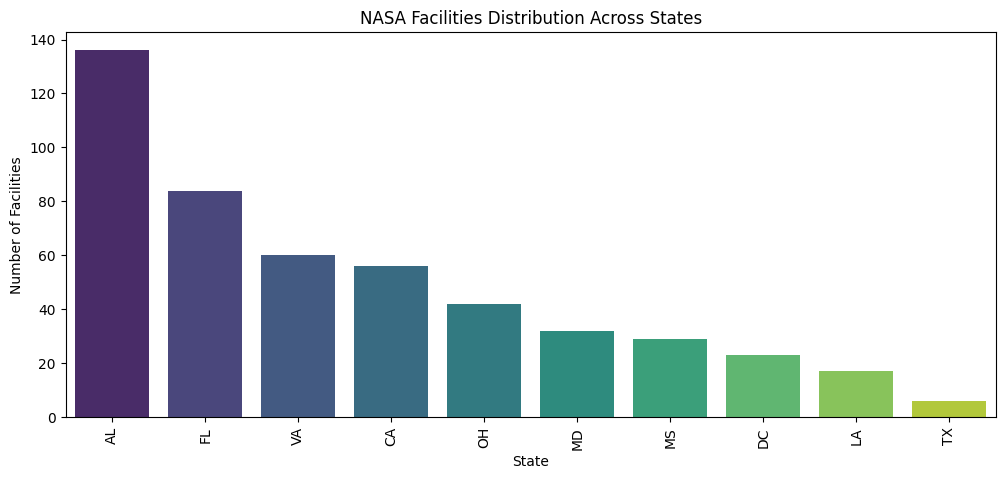

In [41]:
# Count facilities per state
state_counts = nasa['State'].value_counts()

# Plot distribution of facilities across states
plt.figure(figsize=(12, 5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of Facilities")
plt.title("NASA Facilities Distribution Across States")
plt.show()


C:\Users\chand\AppData\Local\Temp\ipykernel_10108\1345680951.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="coolwarm")


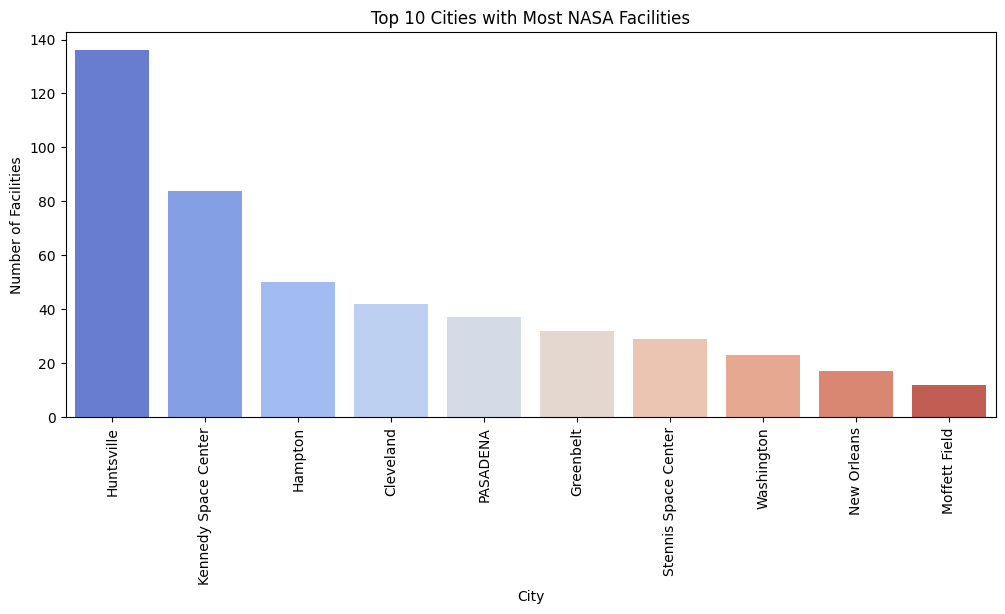

In [42]:
# Count facilities per city
city_counts = nasa['City'].value_counts().head(10)  # Top 10 cities

# Plot distribution of facilities across cities
plt.figure(figsize=(12, 5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Number of Facilities")
plt.title("Top 10 Cities with Most NASA Facilities")
plt.show()


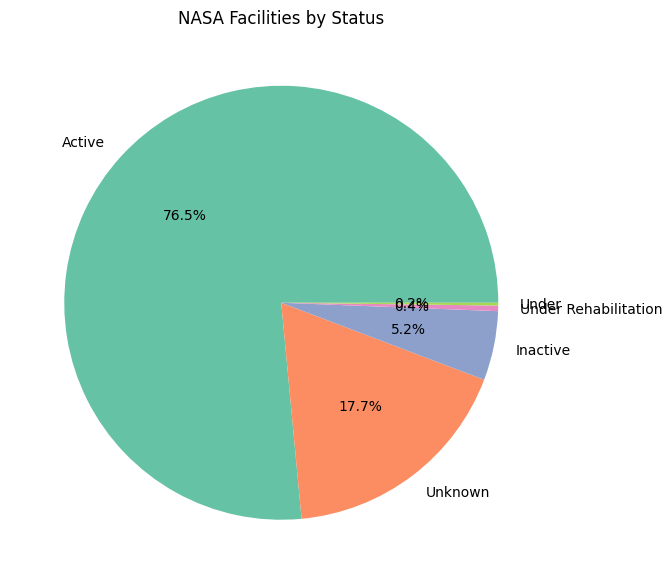

In [44]:
# Count facilities by status
status_counts = nasa['Status'].value_counts()

# Pie chart of facility status
plt.figure(figsize=(7, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("NASA Facilities by Status")
plt.show()


C:\Users\chand\AppData\Local\Temp\ipykernel_10108\3190161247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=center_counts.index, y=center_counts.values, palette="magma")


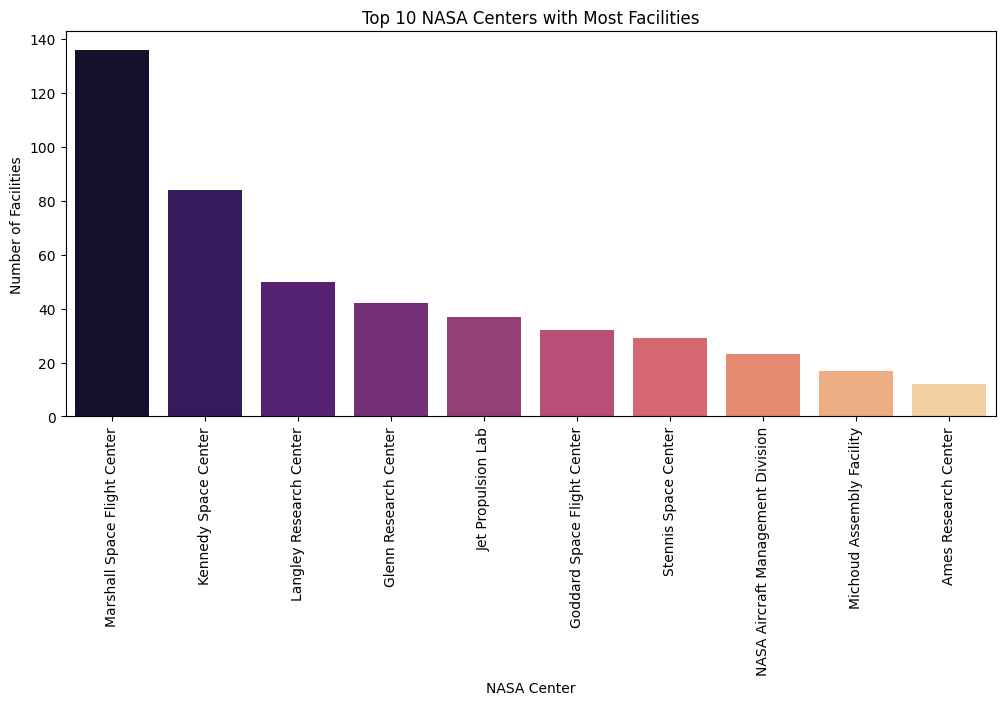

In [45]:
# Count facilities per NASA center
center_counts = nasa['Center'].value_counts().head(10)  # Top 10 centers

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=center_counts.index, y=center_counts.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("NASA Center")
plt.ylabel("Number of Facilities")
plt.title("Top 10 NASA Centers with Most Facilities")
plt.show()


In [46]:
# Create a Folium map centered around the US
nasa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)  # USA center

# Add facility markers
for _, row in nasa.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Facility']} ({row['Status']})",
        icon=folium.Icon(color="blue" if row["Status"] == "Active" else "red"),
    ).add_to(nasa_map)

# Save the map to an HTML file
nasa_map.save("NASA_Facilities_Map.html")

# Display in Jupyter Notebook
nasa_map
